# Capstone I

## Part I

Import required base modules

In [1]:
#drive.flush_and_unmount()

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
#!ls "/content/drive/My Drive"

In [4]:
import pandas as pd
import os
import numpy as np

In [5]:
# specify lables
path = "/content/drive/My Drive/capstone/labels.csv"

In [6]:
data = pd.read_csv(path)

In [7]:
data.head()

,00000000,pickup_truck,213,34,255,50
0,0,car,194,78,273,122
1,0,car,155,27,183,35
2,0,articulated_truck,43,25,109,55
3,0,car,106,32,124,45
4,1,bus,205,155,568,314


In [8]:
data.shape

(351548, 6)

In [9]:
# Load the labels from labels.csv
labels_df = pd.read_csv(path, sep=',', header=None)
labels_df.columns = ['image_id', 'class', 'x_min', 'y_min', 'x_max', 'y_max']

In [10]:
labels_df

,image_id,class,x_min,y_min,x_max,y_max
0,0,pickup_truck,213,34,255,50
1,0,car,194,78,273,122
2,0,car,155,27,183,35
3,0,articulated_truck,43,25,109,55
4,0,car,106,32,124,45
...,...,...,...,...,...,...
351544,110590,car,18,57,97,98
351545,110591,articulated_truck,2,71,690,351
351546,110592,pickup_truck,3,240,214,378
351547,110592,car,465,111,507,135


In [11]:
# Adjust the image IDs in the dataframe
labels_df['image_id'] = labels_df['image_id'].apply(lambda x: f"{x:08d}")

In [12]:
# Use iloc to pick all the images present in the Images folder
labels_df = labels_df.iloc[:17967]

**we are getting memory error now we need to reduce the no of images. But the range of different
image for different calss varies with huge difference. eg one class contains 12000 data and another contains 95.
So, we need to select images from all classes by our own strategy**

In [13]:
labels_df['class'].value_counts()

,count
class,
car,12076
pickup_truck,2136
motorized_vehicle,1295
bus,561
work_van,462
articulated_truck,461
pedestrian,340
single_unit_truck,303
bicycle,130


In [14]:
samples = labels_df['class'].value_counts()
samples

,count
class,
car,12076
pickup_truck,2136
motorized_vehicle,1295
bus,561
work_van,462
articulated_truck,461
pedestrian,340
single_unit_truck,303
bicycle,130


In [15]:
unique = list(labels_df['class'].unique())
unique

['pickup_truck',
 'car',
 'articulated_truck',
 'bus',
 'motorized_vehicle',
 'work_van',
 'single_unit_truck',
 'pedestrian',
 'bicycle',
 'non-motorized_vehicle',
 'motorcycle']

In [16]:
sample_sizes = {}
for lbl in unique:
    if int(samples[lbl]) > 3000:
        sample_sizes[lbl] = int(int(samples[lbl])/3)
    elif int(samples[lbl]) > 600 and int(samples[lbl]) < 3000:
        sample_sizes[lbl] = int(int(samples[lbl])-500)
    else:
        sample_sizes[lbl] = int(samples[lbl])
sample_sizes

{'pickup_truck': 1636,
 'car': 4025,
 'articulated_truck': 461,
 'bus': 561,
 'motorized_vehicle': 795,
 'work_van': 462,
 'single_unit_truck': 303,
 'pedestrian': 340,
 'bicycle': 130,
 'non-motorized_vehicle': 108,
 'motorcycle': 95}

In [17]:
df_sampled = pd.concat([labels_df[labels_df['class'] == label].sample(n=min(sample_sizes[label], len(labels_df[labels_df['class'] == label])), random_state=42)
                        for label in sample_sizes]).reset_index(drop=True)

In [18]:
#df_sampled.head(5000)

In [19]:
labels_df=df_sampled

In [20]:
#Setup Images dir
images_dir = "/content/drive/My Drive/capstone/Images"

In [21]:
for index, row in labels_df.iterrows():
    img_path = os.path.join(images_dir, f"{row['image_id']}.jpg")
    print(img_path)

Streaming output truncated to the last 5000 lines.
/content/drive/My Drive/capstone/Images/00002070.jpg
/content/drive/My Drive/capstone/Images/00002063.jpg
/content/drive/My Drive/capstone/Images/00001126.jpg
/content/drive/My Drive/capstone/Images/00000835.jpg
/content/drive/My Drive/capstone/Images/00004407.jpg
/content/drive/My Drive/capstone/Images/00000126.jpg
/content/drive/My Drive/capstone/Images/00002477.jpg
/content/drive/My Drive/capstone/Images/00003914.jpg
/content/drive/My Drive/capstone/Images/00000817.jpg
/content/drive/My Drive/capstone/Images/00005233.jpg
/content/drive/My Drive/capstone/Images/00000586.jpg
/content/drive/My Drive/capstone/Images/00005217.jpg
/content/drive/My Drive/capstone/Images/00002358.jpg
/content/drive/My Drive/capstone/Images/00004837.jpg
/content/drive/My Drive/capstone/Images/00001533.jpg
/content/drive/My Drive/capstone/Images/00002869.jpg
/content/drive/My Drive/capstone/Images/00003838.jpg
/content/drive/My Drive/capstone/Images/00005631

In [22]:
img_path

'/content/drive/My Drive/capstone/Images/00003411.jpg'

In [23]:
import cv2

In [24]:
# reading image
img = cv2.imread(img_path)


In [25]:
img.shape

(480, 720, 3)

In [26]:
from matplotlib import pyplot as plt

In [27]:
img_path.split("/")[-1].replace('.jpg','')

'00003411'

In [28]:
test_df = labels_df[labels_df['image_id'] == img_path.split("/")[-1].replace('.jpg','')].reset_index(drop=True)
test_df

,image_id,class,x_min,y_min,x_max,y_max
0,00003411,car,206,51,235,68
1,00003411,car,634,179,687,228
2,00003411,motorcycle,188,207,238,286


In [29]:
test_df.iloc[0]['x_min']

206

In [30]:
xmin = []
ymin = []
xmax = []
ymax = []
for ind in range(0,len(test_df)):
  xmin.append(test_df.iloc[ind]['x_min'])
  ymin.append(test_df.iloc[ind]['y_min'])
  xmax.append(test_df.iloc[ind]['x_max'])
  ymax.append(test_df.iloc[ind]['y_max'])
print(xmin)
print(ymin)
print(xmax)
print(ymax)

[206, 634, 188]
[51, 179, 207]
[235, 687, 238]
[68, 228, 286]


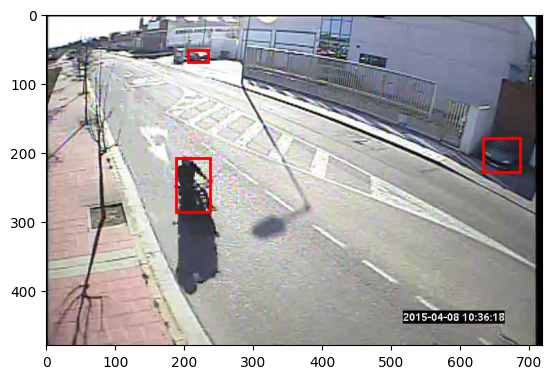

In [31]:
import matplotlib.patches as patches
from PIL import Image

image = Image.open(img_path)

# Create a figure and axis
fig, ax = plt.subplots()

# Display the image
ax.imshow(image)

for ind in range(0,len(test_df)):
  # initializing the boundingbox from csv file data
  xmin=test_df.iloc[ind]['x_min']
  ymin=test_df.iloc[ind]['y_min']
  xmax=test_df.iloc[ind]['x_max']
  ymax=test_df.iloc[ind]['y_max']
  # Define the bounding box using x_min, y_min, x_max, and y_max
  #x_min, y_min = 50, 50  # Top-left corner of the bounding box
  #x_max, y_max = 250, 200  # Bottom-right corner of the bounding box

  # Calculate width and height from x_min, y_min, x_max, y_max
  width = xmax - xmin
  height = ymax - ymin

  # Create a rectangle patch
  rect = patches.Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor='r', facecolor='none')

  # Add the rectangle to the plot
  ax.add_patch(rect)

# Display the plot with the image and bounding box
plt.show()

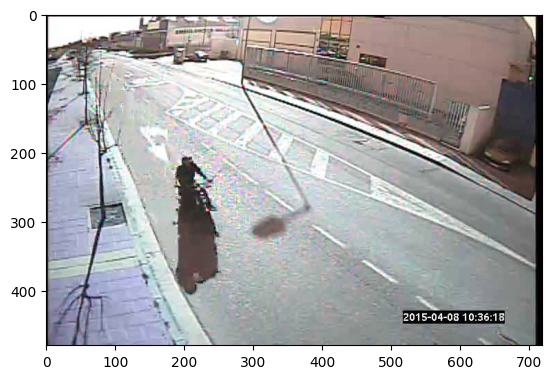

In [32]:
plt.imshow(img)

In [33]:
labels_df['class'].unique()

array(['pickup_truck', 'car', 'articulated_truck', 'bus',
       'motorized_vehicle', 'work_van', 'single_unit_truck', 'pedestrian',
       'bicycle', 'non-motorized_vehicle', 'motorcycle'], dtype=object)

### Read all the images and save in a list

### Use list to split data into Training and Testing

In [34]:
labels = labels_df['class'].to_numpy()
bounding_boxes = labels_df[['x_min', 'y_min', 'x_max', 'y_max']].to_numpy()
bounding_boxes

array([[ 90, 127, 265, 227],
       [248, 124, 391, 182],
       [ 65,  91, 155, 174],
       ...,
       [207, 348, 254, 422],
       [311, 186, 326, 217],
       [188, 207, 238, 286]])

In [35]:
# Convert labels to one-hot encoding
unique_labels = np.unique(labels)
label_to_index = {label: index for index, label in enumerate(unique_labels)}
index_to_label = {index: label for index, label in enumerate(unique_labels)}
labels = np.array([label_to_index[label] for label in labels])

In [36]:
label_to_index

{'articulated_truck': 0,
 'bicycle': 1,
 'bus': 2,
 'car': 3,
 'motorcycle': 4,
 'motorized_vehicle': 5,
 'non-motorized_vehicle': 6,
 'pedestrian': 7,
 'pickup_truck': 8,
 'single_unit_truck': 9,
 'work_van': 10}

In [37]:

original_shape=img.shape
original_shape


(480, 720, 3)

In [38]:
# slecting the dimentions of resized image by maintaing the aspect ratio of the original image
r = 360.0 / img.shape[1]
dim = (360, int(img.shape[0] * r))
dim

(360, 240)

In [39]:
resized = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)

In [40]:
resized.shape

(240, 360, 3)

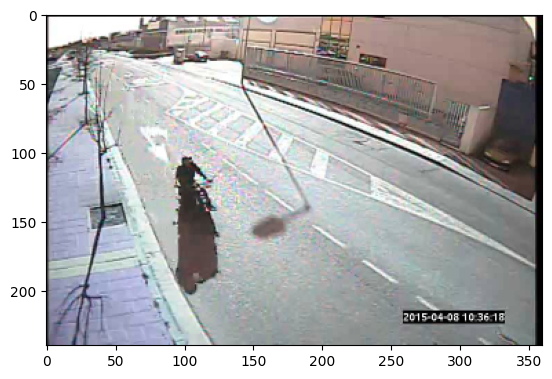

In [41]:
plt.imshow(resized)

In [42]:
from sklearn.model_selection import train_test_split

### Read all images from input folder

In [43]:
from tqdm import tqdm # used to display execution percentage of for loop
images = []
image_size = dim  # Example target size (width, height)

for index, row in tqdm(labels_df.iterrows(), total=len(labels_df)):
#for index, row in labels_df.iterrows():
    img_path = os.path.join(images_dir, f"{row['image_id']}.jpg")
    img = cv2.imread(img_path)

    new_var = None

    if img is not new_var:
        # Resize the image to a consistent size
        img_resized = cv2.resize(img, image_size)
        images.append(img_resized)
    else:
        print(f"Error loading image: {img_path}")

# Convert list of images to a NumPy array
images = np.array(images)

100%|██████████| 8916/8916 [01:26<00:00, 102.61it/s]


In [44]:
images.shape

(8916, 240, 360, 3)

In [45]:
# resizing image to avoid memory error
if len(images) > 0:
    processed_images = [cv2.resize(img, (224, 224)) for img in images]  # Adjust dimensions as needed
    processed_images = np.array(processed_images)
    print("Images resized successfully.")

Images resized successfully.


In [46]:
scale_x = 224 / original_shape[1]
scale_y = 224 / original_shape[0]
scale_x

0.3111111111111111

In [47]:
# resizing boundingboxes

for i in range(0,len(bounding_boxes)):
  bounding_boxes[i][0] = bounding_boxes[i][0]*scale_x
  bounding_boxes[i][1] = bounding_boxes[i][1]*scale_y
  bounding_boxes[i][2] = bounding_boxes[i][2]*scale_x
  bounding_boxes[i][3] = bounding_boxes[i][3]*scale_y

bounding_boxes

array([[ 28,  59,  82, 105],
       [ 77,  57, 121,  84],
       [ 20,  42,  48,  81],
       ...,
       [ 64, 162,  79, 196],
       [ 96,  86, 101, 101],
       [ 58,  96,  74, 133]])

In [48]:
del images

In [49]:
processed_images.shape

(8916, 224, 224, 3)

In [50]:
X_train, X_test, y_train, y_test, bbox_train, bbox_test = train_test_split(processed_images, labels, bounding_boxes, test_size=0.2, random_state=42)

### Add one_hot encoding for vehicle class

In [51]:
#from tensorflow.keras.utils import to_categorical

# Assuming y_train and y_test contain integer class labels (e.g., 0, 1, 2,..., 10)

#y_train = to_categorical(y_train, num_classes=11)
#y_test = to_categorical(y_test, num_classes=11)

***Note : if y_train is integer (eg, 0,1,2...,10) use sparse_categorical_crossentropy for loss function.
If y_train is one hot encoded use categorical_crossentropy.
Sparse_categorical_crossentropy is faster***

### Model Building

In [52]:
y_test

array([3, 0, 3, ..., 2, 0, 3])

In [53]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [54]:
#layers.Conv2D?

In [55]:
def create_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    x = layers.Conv2D(64, (3, 3), activation='relu', padding='valid')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.BatchNormalization()(x)


    x = layers.Conv2D(64, (3, 3), activation='relu', padding='valid', kernel_regularizer=l2(0.00005))(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.BatchNormalization()(x)


    x = layers.Conv2D(32, (3, 3), activation='relu', padding='valid', kernel_regularizer=l2(0.00005))(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.BatchNormalization()(x)

    # Flatten and Dense layers
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)

    vehicle_class_out = layers.Dense(num_classes, activation='softmax', name='vehicle_class')(x)
    bounding_box_out = layers.Dense(4, name='bounding_box')(x)

    model = keras.Model(inputs=inputs, outputs=[vehicle_class_out, bounding_box_out])
    return model



### Model compilation

In [56]:
input_shape = processed_images[0].shape
print(input_shape)
num_classes = len(unique_labels)
print (num_classes)
model = create_model(input_shape, num_classes)

(224, 224, 3)
11


In [57]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 222, 222, 64)   │          1,792 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 111, 111, 64)   │              0 │ conv2d[0][0]           │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 111, 111, 64)   │            256 │ max_pooling2d[0][0]    │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 109, 109, 64)   │         36,928 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 54, 54, 64)     │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 54, 54, 64)     │            256 │ max_pooling2d_1[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 52, 52, 32)     │         18,464 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 26, 26, 32)     │              0 │ conv2d_2[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 26, 26, 32)     │            128 │ max_pooling2d_2[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 21632)          │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │      2,769,024 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 128)            │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ vehicle_class (Dense)     │ (None, 11)             │          1,419 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bounding_box (Dense)      │ (None, 4)              │            516 │ dropout[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,828,783 (10.79 MB)

 Trainable params: 2,828,463 (10.79 MB)

 Non-trainable params: 320 (1.25 KB)

In [58]:
from tensorflow.keras.losses import Huber

In [59]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss={'vehicle_class': 'sparse_categorical_crossentropy', 'bounding_box': 'mse'},
              metrics={'vehicle_class': 'accuracy', 'bounding_box': 'mae'})

### Model training

In [60]:
y_train.shape

(7132,)

In [61]:
y_test.shape

(1784,)

In [62]:
bbox_train.shape

(7132, 4)

In [63]:
bbox_test.shape

(1784, 4)

In [64]:
#Reduce Learning Rate on Plateau: Is used to reduce the learning rate when a metric has stopped improving.
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

In [65]:
history = model.fit(X_train, {'vehicle_class': y_train, 'bounding_box': bbox_train},
                    epochs=15, validation_split=0.2,
                    batch_size=32)
                    #callbacks=[reduce_lr])

Epoch 1/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 991s 6s/step - bounding_box_mae: 48.4858 - loss: 4044.8418 - vehicle_class_accuracy: 0.1994 - val_bounding_box_mae: 40.2233 - val_loss: 2832.6431 - val_vehicle_class_accuracy: 0.3910
Epoch 2/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 1053s 6s/step - bounding_box_mae: 39.4513 - loss: 2641.9229 - vehicle_class_accuracy: 0.2661 - val_bounding_box_mae: 37.7718 - val_loss: 2365.3291 - val_vehicle_class_accuracy: 0.4604
Epoch 3/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 1045s 6s/step - bounding_box_mae: 37.9948 - loss: 2481.5925 - vehicle_class_accuracy: 0.2735 - val_bounding_box_mae: 41.3651 - val_loss: 3076.1279 - val_vehicle_class_accuracy: 0.3217
Epoch 4/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 1054s 6s/step - bounding_box_mae: 37.6001 - loss: 2448.7429 - vehicle_class_accuracy: 0.2892 - val_bounding_box_mae: 37.5896 - val_loss: 2344.1938 - val_vehicle_class_accuracy: 0.4583
Epoch 5/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 1000s 5s/step - bounding_box_mae: 36.7638 - loss: 2338.7078 - veh

In [66]:
history.history.keys()

dict_keys(['bounding_box_mae', 'loss', 'vehicle_class_accuracy', 'val_bounding_box_mae', 'val_loss', 'val_vehicle_class_accuracy'])

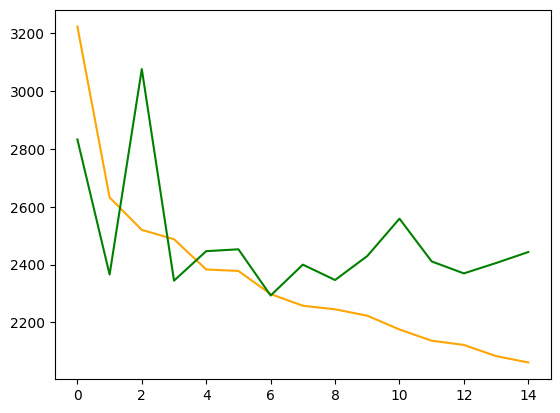

In [67]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color='orange')
plt.plot(history.history['val_loss'], color='green')

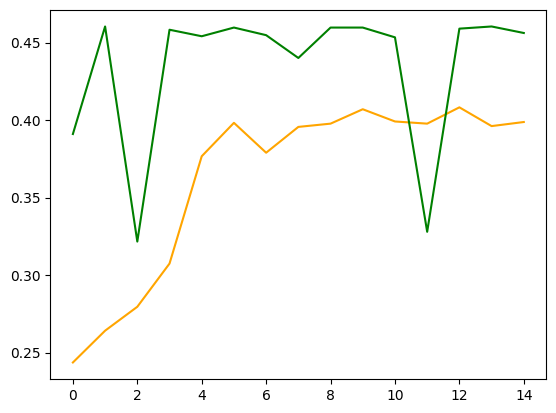

In [68]:
plt.plot(history.history['vehicle_class_accuracy'], color='orange')
plt.plot(history.history['val_vehicle_class_accuracy'], color='green')

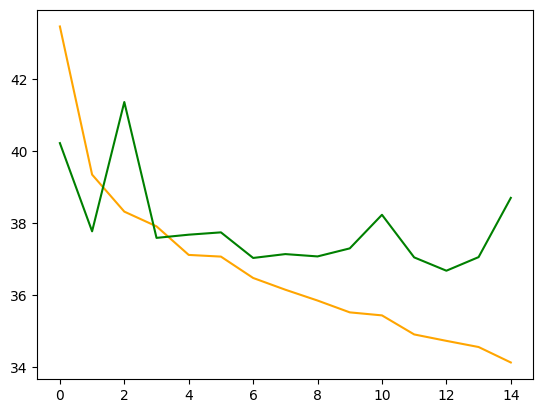

In [69]:
plt.plot(history.history['bounding_box_mae'], color='orange')
plt.plot(history.history['val_bounding_box_mae'], color='green')

In [70]:
predictions = model.predict(X_test)
predictions

56/56 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step


[array([[0.0375502 , 0.01001046, 0.10376935, ..., 0.09333573, 0.03559096,
         0.03703169],
        [0.00823565, 0.00097463, 0.06352536, ..., 0.03313515, 0.00925777,
         0.00979486],
        [0.00421504, 0.00110282, 0.03409994, ..., 0.01681504, 0.00512101,
         0.00650717],
        ...,
        [0.02105163, 0.00230678, 0.06782638, ..., 0.05150077, 0.01988833,
         0.01600778],
        [0.05196049, 0.00917163, 0.10875449, ..., 0.12010068, 0.01889327,
         0.04841616],
        [0.02899155, 0.00689772, 0.08060525, ..., 0.11304816, 0.02590425,
         0.02829332]], dtype=float32),
 array([[ 32.364155,  24.671455,  53.17144 ,  42.404896],
        [ 87.86299 ,  64.95896 , 120.38037 ,  97.299446],
        [119.6028  ,  73.97494 , 147.87607 , 104.42544 ],
        ...,
        [ 76.831604,  53.868042, 100.053955,  76.64702 ],
        [ 26.21461 ,  19.241112,  41.678253,  31.699638],
        [ 50.148525,  27.039373,  66.830025,  41.4911  ]], dtype=float32)]

array([[[ 26,  17,  14],
        [ 19,  10,   7],
        [ 14,   5,   4],
        ...,
        [ 18,   8,   9],
        [ 18,   8,   9],
        [ 16,   8,   9]],

       [[ 27,  18,  17],
        [ 86,  78,  74],
        [ 97,  90,  87],
        ...,
        [ 54,  43,  45],
        [ 14,   4,   5],
        [ 10,   2,   3]],

       [[ 64,  55,  52],
        [202, 193, 189],
        [224, 216, 213],
        ...,
        [ 85,  74,  76],
        [ 10,   1,   1],
        [ 10,   2,   3]],

       ...,

       [[  6,  20,  16],
        [ 42,  59,  55],
        [ 52,  68,  65],
        ...,
        [ 29,  39,  37],
        [  0,   5,   3],
        [  0,   1,   0]],

       [[  6,  20,  16],
        [ 42,  59,  55],
        [ 51,  68,  65],
        ...,
        [ 29,  39,  37],
        [  0,   5,   4],
        [  0,   1,   0]],

       [[  6,  20,  16],
        [ 42,  59,  55],
        [ 51,  68,  65],
        ...,
        [ 29,  39,  37],
        [  0,   5,   4],
        [  0,   1,   0]]], dtype=uint8)
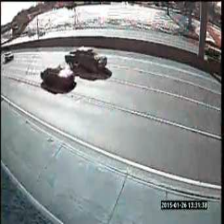

In [81]:
X_test[0]


In [82]:
list(predictions[0][0]).index(max(predictions[0][0]))

3

In [83]:
value = {i for i in label_to_index if label_to_index[i]==list(predictions[0][0]).index(max(predictions[0][0]))}
value

{'car'}

In [84]:
list(predictions[1][0])

[32.364155, 24.671455, 53.17144, 42.404896]

In [85]:
def image_with_boundingbox(image, bounding_box, class_index):
  # Create a figure and axis
  fig, ax = plt.subplots()
  #image=cv2.resize(image, dim)
  # Display the image
  ax.imshow(image)

  #for ind in range(0,len(test_df)):
  # initializing the boundingbox from csv file data
  xmin, ymin, xmax, ymax = bounding_box

  # Define the bounding box using x_min, y_min, x_max, and y_max
  #x_min, y_min = 50, 50  # Top-left corner of the bounding box
  #x_max, y_max = 250, 200  # Bottom-right corner of the bounding box

  # Calculate width and height from x_min, y_min, x_max, y_max
  width = xmax - xmin
  height = ymax - ymin

  # Create a rectangle patch
  rect = patches.Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor='r', facecolor='none')

  # Add the rectangle to the plot
  ax.add_patch(rect)

  # identifying the class it predicted from one hot encoding by using max percentage
  value = {i for i in label_to_index if label_to_index[i]==class_index}
  plt.title("Predicted as - " + str(value))
  # Display the plot with the image and bounding box
  plt.show()

In [92]:
predictions[1][60]

array([53.218845, 26.322102, 70.359116, 40.95589 ], dtype=float32)

In [87]:
list(predictions[0][1]).index(max(predictions[0][1]))

3

In [97]:
len(X_test)

1784

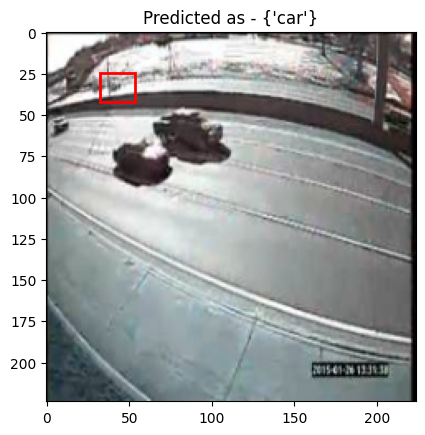

In [101]:
image_with_boundingbox(X_test[0], list(predictions[1][0]), list(predictions[0][0]).index(max(predictions[0][0])))

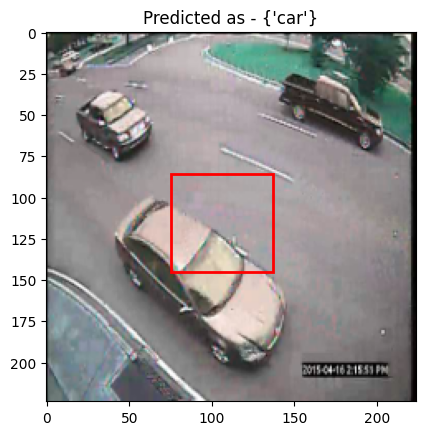

In [102]:
image_with_boundingbox(X_test[10], list(predictions[1][10]), list(predictions[0][10]).index(max(predictions[0][10])))

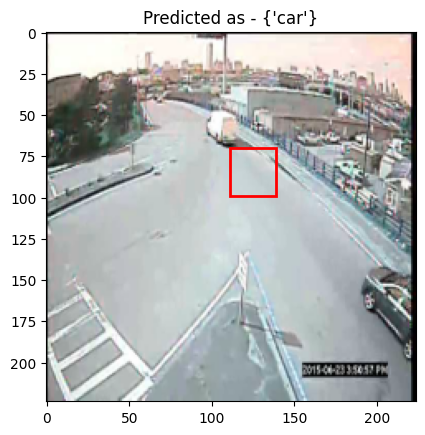

In [103]:
image_with_boundingbox(X_test[20], list(predictions[1][20]), list(predictions[0][20]).index(max(predictions[0][20])))

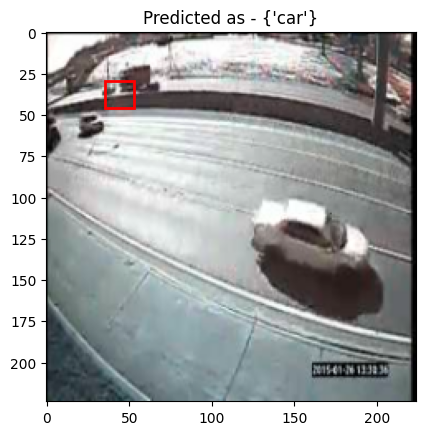

In [104]:
image_with_boundingbox(X_test[100], list(predictions[1][100]), list(predictions[0][100]).index(max(predictions[0][100])))

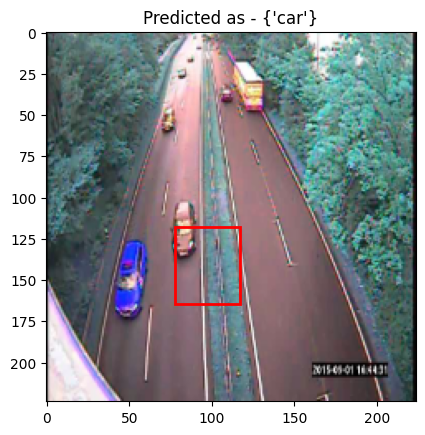

In [105]:
image_with_boundingbox(X_test[700], list(predictions[1][700]), list(predictions[0][700]).index(max(predictions[0][700])))

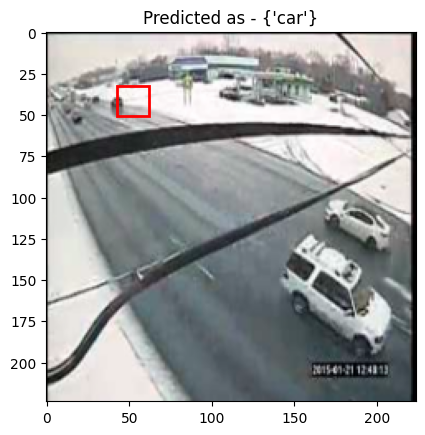

In [106]:
image_with_boundingbox(X_test[1300], list(predictions[1][1300]), list(predictions[0][1300]).index(max(predictions[0][1300])))